In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
data = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Sample with Target

In [5]:
df = data.drop(['age','sex'],axis = 1)

In [6]:
y = df.target.values
x_data = df.drop(['target'],axis = 1)

In [7]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) # normalization
x.head()

,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T
print('x_train : ',x_train.shape)
print('x_test  : ',y_train.shape)
print('y_train : ',x_test.shape)
print('y_test  : ',y_test.shape)

x_train :  (11, 242)
x_test  :  (242,)
y_train :  (11, 61)
y_test  :  (61,)


Sort Way For Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
print("Accuary: % {}".format(lr.score(x_test.T,y_test.T)))

Accuary: % 0.8688524590163934


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Long War For Logistic Regression

In [12]:
# 1 -  initialize_weights_and_bias
# 2 -  sigmoid
# 3 -  forward_and_backward
# 4 -  update
# 5 -  Predict
# 6 -  Logistic Regression

In [13]:
# 1
def initialize(demintion):
    w = np.full((demintion,1),0.01)
    b = 0.0
    return w,b

In [14]:
# 2
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [15]:
# 3
def forward_and_backward(w,b,x_train,y_train):
    # forward
    z = np.dot(w.T,x_train)+b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = np.sum((loss)) / x_train.shape[1]
    # backward
    derivative_weight = (np.dot(x_train,(y_head - y_train).T)) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradient = {'derivative_weight':derivative_weight,'derivative_bias':derivative_bias}
    return cost,gradient

In [16]:
# 4
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    for i in range(number_of_iteration):
        cost,gradient = forward_and_backward(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradient['derivative_weight']
        b = b - learning_rate * gradient['derivative_bias']
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            if i == np.max(number_of_iteration):
                print('After iteration cost {} {}'.format(i,cost))
    parametres = {'weight':w,'bias':b}
    plt.subplots(figsize = (9,6))
    plt.plot(index,cost_list2)
    plt.grid()
    plt.xlabel('Number of Iteration',fontsize = 15)
    plt.ylabel('Cost',fontsize = 15)
    plt.plot()
    return cost_list,parametres

In [17]:
# 5 
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_predict = np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_predict[0,i] = 0
        else:
            y_predict[0,i] = 1
    return y_predict

In [18]:
# 6
def logistic(x_train,y_train,x_test,y_test,learning_rate,number_of_iteration):
    demintion = x_train.shape[0]
    w,b = initialize(demintion)
    cost_list,parametres= update(w,b,x_train,y_train,learning_rate,number_of_iteration)
    y_predict_test = predict(parametres['weight'],parametres['bias'],x_test)
    print(' Test Accuary: % {}'.format(100 - np.mean(np.abs(y_predict_test - y_test)) * 100))

 Test Accuary: % 86.88524590163934


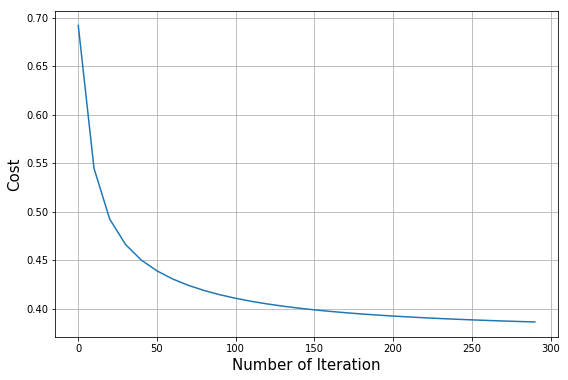

In [19]:
logistic(x_train,y_train,x_test,y_test,learning_rate = 1,number_of_iteration = 300)

In [ ]:
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T